# Predspracovanie údajov

> ## Chýbajúce hodnoty

> ## Vychýlené hodnoty

> ## Normalizácia údajov

> ## Transformácia numerických atribútov na kategorické

> ## Transformácia kategorických údajov na numerické

> ## Vytváranie atribútov kombinovaním

Na predspracovanie odporúčame využiť knižnicu `scikit-learn`. Možnosti, ktoré na predspracovanie ponúka, nájdete tu: http://scikit-learn.org/stable/modules/preprocessing.html

Vyčerpávajúci zoznam množstva ďalších vecí, čo sa dá robiť pri príprave dát a tvorbe čŕt nájdete tu: http://www.datasciencecentral.com/profiles/blogs/feature-engineering-data-scientist-s-secret-sauce-1

Pekne spracované je predspracovanie a čistenie dát aj tu (akurát s príkladmi v R, nie pythone): https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf Zaujímavá je hlavne časť k chýbajúcim a vychýleným hodnotám.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = 6, 4
from IPython.display import Image

# Chýbajuce hodnoty

Existujú viaceré stratégie nahrádzania chýbajúcich hodnôt. Medzi najčastejšie patria:

* nahradenie chýbajúcej hodnoty mediánom
* nahradenie chýbajúcej hodnoty priemerom
* nahradenie chýbajúcej hodnoty pomerom ku korelovanému atribútu
* nahradenie chýbajúcej hodnoty priemerom segmentu
* nahradenie chýbajúcej hodnoty pomocou lineárnej regresie
* nahradenie chýbajúcej hodnoty pomocou algoritmu k-najbližších
susedov

In [2]:
iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()
# toto je trochu spotvoreny dataset kvetiniek

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
iris_data[iris_data.isnull().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [5]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [6]:
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

In [7]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'

In [8]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
iris_data.petal_width_cm.mean()

1.2365517241379318

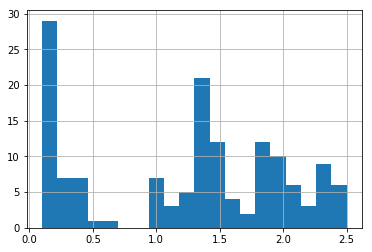

In [10]:
iris_data.petal_width_cm.hist(bins=20)

C:\Users\robom\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\robom\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


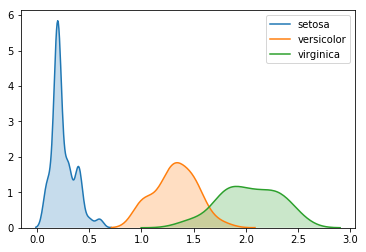

In [11]:
seaborn.kdeplot(iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'], shade=True, label='setosa')
seaborn.kdeplot(iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'petal_width_cm'], shade=True, label='versicolor')
seaborn.kdeplot(iris_data.loc[iris_data['class'] == 'Iris-virginica', 'petal_width_cm'], shade=True, label='virginica')

In [12]:
setosa_petal_width_mean = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
setosa_petal_width_mean

0.25111111111111106

In [13]:
iris_data.loc[(iris_data['class'] == 'Iris-setosa') & iris_data['petal_width_cm'].isnull(), 'petal_width_cm'] = setosa_petal_width_mean

In [14]:
iris_data[iris_data.isnull().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


Užitočné metódy/knižnice na prácu s chýbajúcimi hodnotami:

* `dropna`, `fillna`
* `sklearn.preprocessing.Imputer`: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
* `fancyimpute`: https://github.com/iskandr/fancyimpute

Ďalšie informácie k chýbajúcim hodnotám môžete nájsť tu: https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

# Vychýlené hodnoty

Aj pri riešení vychýlených hodnôt možno aplikovať viaceré stratégie:

* odstránenie vychýlených (odľahlých) pozorovaní
* nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (5 percentilom, resp. 95 percentilom)
* transformácia atribútu s vychýlenými hodnotami pomocou zvolenej funkcie (logaritmus, odmocnina a pod.)

*Pozor*: Pri rozhodovaní, čo je, a čo nie je vychýlená hodnota, treba brať do úvahy rozdelenie premennej. Určenie vychýlených hodnôt pomocou boxplotu funguje pre normálne rozdelenie. Ak má premenná iné rozdelenie, môžeme ju transformovať (normalizovať).

# Normalizácia udajov

In [15]:
data_file = "./data/x_train.csv"
challenge_data = pd.read_csv(data_file, nrows=1000, sep=',', header=None)
challenge_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.400931,4.235430,7.147523,0.455781,-1.471710,0.368072,1.402726,3.231591,-1.111184,2.542668,...,-1.278341,0.081948,0.934971,0.988862,-2.817641,0.573825,3.931404,0.204244,10.623778,-8.322258
1,2.959725,-2.146311,1.201100,4.206000,6.006231,1.064849,-1.838940,-0.227245,-0.346572,-0.451681,...,-3.672226,-1.047564,-1.498405,-0.921323,-0.384467,-1.260944,-0.721455,3.082391,6.122824,-2.656565
2,3.543542,-0.753945,0.459010,1.193610,4.166587,1.610900,-3.181179,-0.414485,-3.642286,0.527908,...,-5.564399,-0.667491,-2.781279,0.389482,-3.455173,0.395151,1.614165,0.867497,6.588551,-6.279469
3,-2.940113,1.279881,-2.462053,-0.744649,-1.845080,-2.705489,1.125120,-0.839736,-3.896343,-1.120876,...,3.240573,-0.576021,3.706526,1.195011,-1.887120,-0.813390,-0.098769,0.525311,12.889137,-5.339454
4,6.907914,-1.035285,-1.841294,-0.060504,4.320388,2.423103,-5.194417,-0.937909,-4.159663,4.763647,...,-0.639724,1.529124,-2.930810,0.347728,-3.324413,3.475989,4.956617,0.037510,5.432440,-2.220027


In [16]:
challenge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7D068F278>,
      dtype=object)

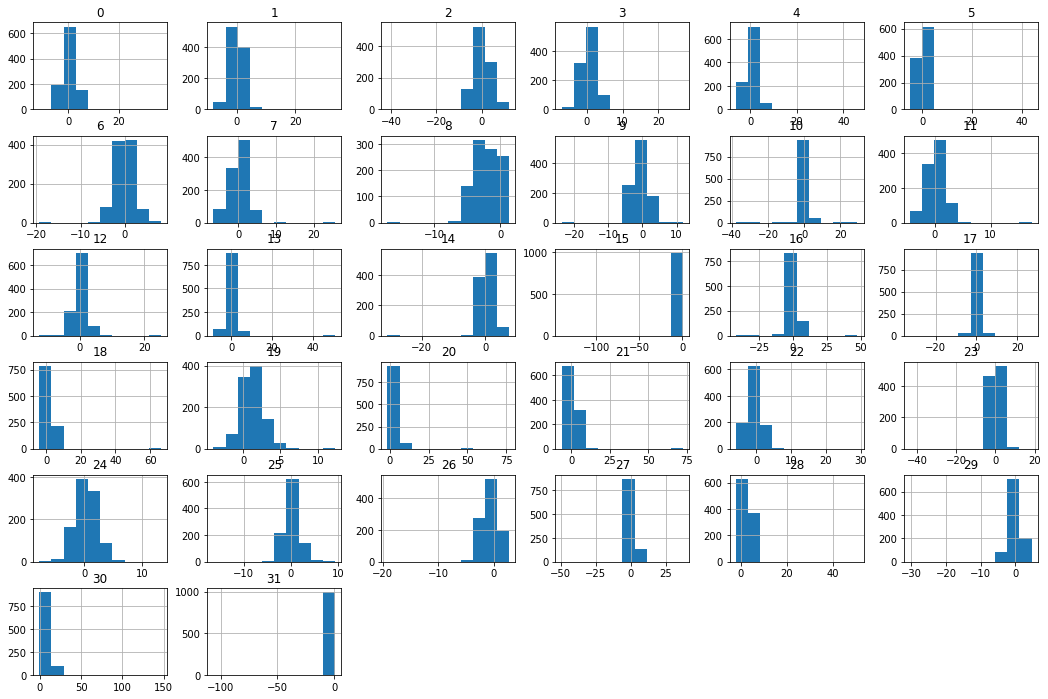

In [17]:
challenge_data.hist(figsize=(18, 12))

Text(0.5,1,'20')

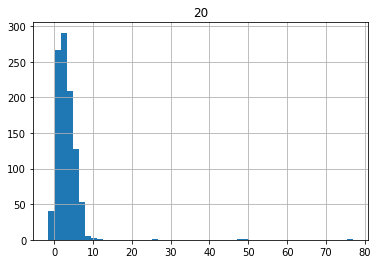

In [18]:
index = 20
pom = challenge_data[index].hist(bins=50)
pom.set_title(index)

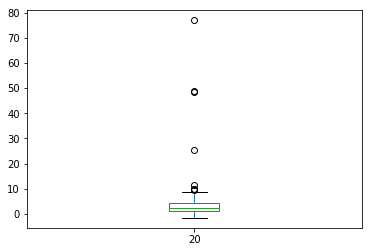

In [19]:
challenge_data[index].plot(kind='box')

In [20]:
challenge_data[20].min()

-1.5215626955032349

Text(0.5,1,'index: 20 (log transform)')

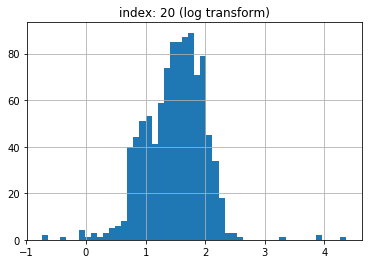

In [21]:
index = 20
transformed = np.log(challenge_data[index]+2)
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: %d (log transform)" % index)

Lepšie ako logaritmus je použiť Box-Cox. Box-Cox sa dokáže postarať o to, aby sa výsledné rozelenie podobalo normálnemu. Viac info o tom, ako Box-Cox funguje, najdete tu: http://onlinestatbook.com/2/transformations/box-cox.html

In [22]:
from scipy.stats import boxcox

Text(0.5,1,'index: 20 (box-cox)')

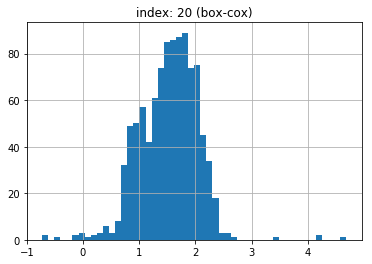

In [23]:
index = 20
transformed, att = boxcox(challenge_data[index]+2) # boxcox vrati transformovane data a parametre transformacie. Tie viem zafixovat a v tom pripade mi to vrati len transformovane data
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: %d (box-cox)" % index)

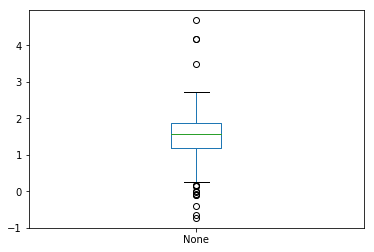

In [24]:
pd.Series(transformed).plot(kind='box')

In [25]:
# z-normalization: shift = mean, scale = std
# 0-1 normalization: shift = min, scale =  max - min
# toto iste robi StandardScaler pre vsetky atributy. Pozor ale na power law
# ak pouzijete RobustScaler, tak si viete poradit aj s outliermi (pouziva rozsah 1st quartile (25th quantile) and the 3rd quartile (75th quantile))
def normalization(data, shift, scale): 
    return (np.array(data) - float(shift))/scale

Text(0.5,1,'throughput (Z-normalization)')

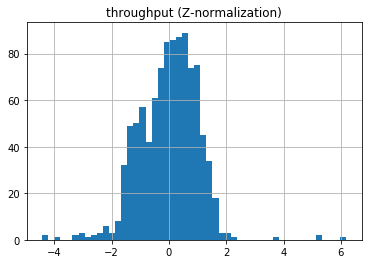

In [26]:
z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

Text(0.5,1,'throughput (Z-normalization)')

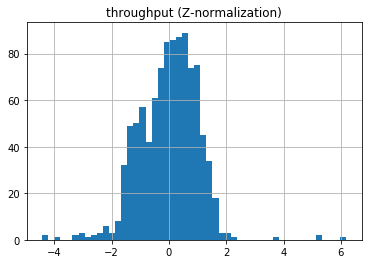

In [27]:
# sklearn.preprocessing
z_transformed = preprocessing.scale(transformed)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

# Transformácia numerických atribútov na kategorické - diskretizácia

Pre niektoré algoritmy nie sú číselné dáta úplne vhodné. Napríklad taký Naivný Bayes potrebuje kategorické hodnoty. Tie sa dajú vytvoriť zaradením numerických hodnôt do intervalov.

Intervaly su buď manuálne nastavené, alebo také, aby ich šírka bola rovnaká (*equal width binning/discretization*) alebo počty prvkov (*equal frequency binning/discretization*), ktoré do nich spadajú boli približne rovnaké. 

## Rovnaká šírka intervalov

In [28]:
z_transformed[:10]

array([ 0.10657099,  0.16580308,  0.8440961 , -1.24717423,  0.48185395,
       -0.55594854,  0.3699829 , -0.04235558, -1.22058166, -0.61991132])

In [29]:
bin_count = 10
bins = np.linspace(z_transformed.min(), z_transformed.max(), bin_count)
ew_digitized = np.digitize(z_transformed, bins)
ew_digitized[:10]

array([4, 4, 5, 3, 5, 4, 5, 4, 3, 4], dtype=int64)

In [30]:
bins

array([-4.42671654, -3.24692043, -2.06712432, -0.88732821,  0.29246791,
        1.47226402,  2.65206013,  3.83185624,  5.01165235,  6.19144847])

<BarContainer object of 9 artists>

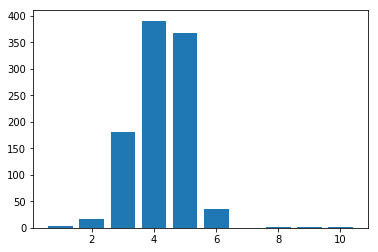

In [31]:
plt.bar(*np.unique(ew_digitized, return_counts=True))

Pri rovnako širokých intervaloch sme rovnomerne rozdelili intrval medzi maximálnou a minimálnou hodnotou. Nič nám nebráni definovať si vlastné, rôzne široké intervaly a spraviť z toho prístup používajúci manuálne definované intervaly.

## Rovnaká početnosť intervalov

Chceme, aby boli intervaly približne rovnako početné. Predpokladajme, že sme už spravili nejaké transformácie dát, a tie teraz približne dodržujú normálne rozdelenie.

(0, 0.45)

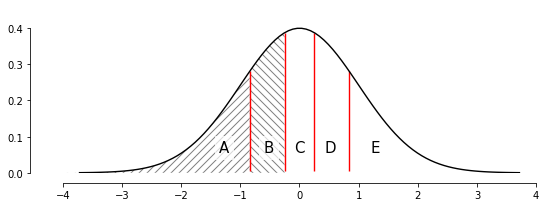

In [32]:
# Toto je kod na vytvorenie fancy grafu, ktory nemusite podrobne studovat, ak sa vam nechce. 
# Dolezity je vysledok, aby sme na nom vysvetlili princip transformacie.

from scipy.stats import norm

def breakpoints(alphabetSize):
        return list(map(norm.ppf, np.linspace(0,1,alphabetSize+1)[1:-1]))
    
def interval_centres(alphabetSize):
    return breakpoints(alphabetSize * 2)[::2]
    
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

plt.rcParams['figure.figsize'] = 9, 3

fig, ax = plt.subplots(1, 1)

symbol_num = 5
brp = breakpoints(symbol_num)
centres = interval_centres(symbol_num)
lw = 1.4

plt.vlines(brp, 0.005, list(map(norm.pdf, brp)), color='red', linewidth=lw)

x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 100)
ax.plot(x, norm.pdf(x), '-', color='black', linewidth=lw)

hatched2 = np.linspace(-4, brp[0], 100)
ax.fill_between(hatched2, norm.pdf(hatched2), facecolor="none", hatch="///", edgecolor="black", linewidth=0.0, alpha=0.5)

hatched = np.linspace(brp[0], brp[1], 100)
ax.fill_between(hatched, norm.pdf(hatched), facecolor="none", hatch='\\\\\\', edgecolor="black", linewidth=0.0, alpha=0.5)

adjust_spines(ax, ['left', 'bottom'])
# adjust_spines(ax, ['bottom'])

letters = 'ABCDEFGHIJKLMNOPQRSTUVXYZ'
for i in range(symbol_num):
    ax.annotate(letters[i], xy=(centres[i], 0.05), horizontalalignment='center', verticalalignment='middle', backgroundcolor='w', 
                fontsize='15', color='black', bbox=dict(color='white', alpha=0.7))

ax.set_ylim([0, 0.45])

Každý interval má presne rovnaký obsah pod krivkou. To znamená, že ak podľa týchto intervalov rozdelíme dáta z normálneho rozdelenia do rôznych symbolov / kategorických hodnôt, početnosť každej z týchto hodnôt bude približne rovnaká.

In [33]:
plt.rcParams['figure.figsize'] = 6, 4

In [34]:
def create_breakpoints(alphabetSize):
        brkp_list = list(map(norm.ppf, np.linspace(0,1,alphabetSize+1)))
        return [(brkp_list[i], brkp_list[i+1]) for i in range(alphabetSize)]
create_breakpoints(5)

[(-inf, -0.8416212335729142),
 (-0.8416212335729142, -0.2533471031357997),
 (-0.2533471031357997, 0.25334710313580006),
 (0.25334710313580006, 0.8416212335729143),
 (0.8416212335729143, inf)]

In [35]:
def interval_transform(data, breakpoints):
    def get_interval(value, breakpoints):
        for index in range(len(breakpoints)):
            breakpoint = breakpoints[index]
            if value > breakpoint[0] and value <= breakpoint[1]:
                return index
        return len(breakpoints)
    
    return pd.Series([get_interval(value, breakpoints) for value in data])

Text(0.5,1,'transformed attribute (Interval normalization)')

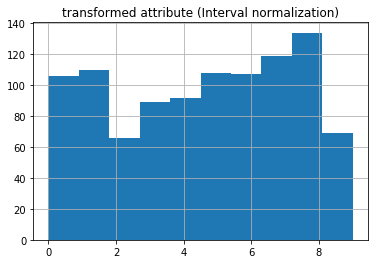

In [36]:
interval_number = 10
interval_transformed = interval_transform(z_transformed, create_breakpoints(interval_number))
pom = pd.Series(interval_transformed).hist(bins=interval_number)
pom.set_title('transformed attribute (Interval normalization)')

Keďže sme nemali úplne pekné normálne rozdelenie, tak ani intervaly nie sú úplne rovnomerne početné, ale nie sme ďaleko.

## Niečo podobné by sa dalo dosiahnuť aj pomocou percentilov v prípade, ak nemáme normalizované dáta.

Toto by sme vedeli púšťať na hociaké rozdelenie dát a nemuseli by sme sa spoliehať na nejaké teoretické rozdelenie, ktoré by mali tie naše dáta spĺňať. A dokonca bude ten zápis aj jednoduchší.

In [37]:
data = challenge_data[20] # tuna nepotrebujeme transformovat data, ale ak by sme, tak nam to nijak neprekaza

bin_count = 10
percentiles = np.linspace(0, 100, bin_count, endpoint = False)
bins = list(map(lambda x: np.percentile(data, x), percentiles))
ef_digitized = np.digitize(data, bins)
ef_digitized[:10]

array([6, 6, 8, 2, 7, 3, 7, 5, 2, 3], dtype=int64)

In [38]:
percentiles

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [39]:
bins

[-1.5215626955032349,
 0.3481952660537032,
 0.878680005317,
 1.5704484939575194,
 2.106584409165542,
 2.592609643936157,
 3.1949773599911797,
 3.8665801048278805,
 4.695518307476256,
 5.678778468091513]

<BarContainer object of 10 artists>

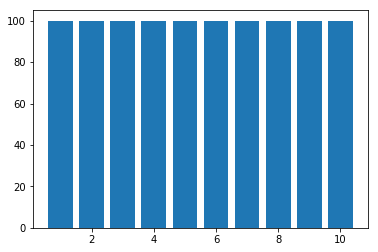

In [40]:
plt.bar(*np.unique(ef_digitized, return_counts=True))

### Čo sa stane, ak tú istú transformáciu pustíme na testovacích dátach?

<BarContainer object of 11 artists>

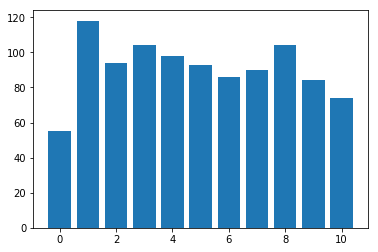

In [41]:
challenge_data_test = pd.read_csv("./data/x_test.csv", nrows=1000, sep=',', header=None)
test_data = challenge_data_test[20]

# Nezmenim biny, cize pouzivam transformaciu, ktoru som natrenoval na trenovacich datach. 
# Na toto si treba dat pozor. Nikdy transformaciu nemozem menit pre trenovacie a pre testovacie data.
ef_digitized_test = np.digitize(test_data, bins)
plt.bar(*np.unique(ef_digitized_test, return_counts=True))

# Transformácia numerických dát na binárne

Toto je jednoduché, potrebujeme si len zobrať nejakú hranicu a všetko, čo je pod ňou, bude 0 a nad ňou 1.

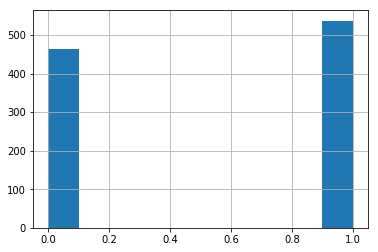

In [42]:
binarizer = preprocessing.Binarizer(0) # v tomto pripade je hranica 0
binary = binarizer.transform(z_transformed.reshape(1, -1))
pd.Series(binary[0]).hist()

# Transformácia kategorických údajov na numerické

http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/

https://github.com/wdm0006/categorical_encoding

https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/

### Existuje viacero spôsobov, ako transformovať kategorickú hodnotu na číslo 

1. `Ordinal` - priradzovanie čísel postupne rôznym hodnotám.
2. `One-hot` - z každej kategórie vznikne stĺpec s hodnotou 1 v tých riadkoch, ktoré boli nastavené na túto hodnotu, inde 0.
3. `Binary` - zoberie sa ordinal, zakóduju sa čísla ako binárne, každá číslica binárneho čísla je použitá ako stĺpec a tam, kde bola na zodpovedajúcom mieste 1, tam bude v stĺpci 1 a inak 0.
4. `Sum` - porovnáva sa priemer závislej premennej na riadokch jednej skupiny oproti priemeru závislej premennej na celej dátovej sade.
5. `Helmert` - veľmi podobné ako Sum, len jedinečnosť kategorickej hodnoty je daná inou kombináciou hodnôt.
6. `BackwardDifferenceEncoder` - veľmi podobné ako Sum, len jedinečnosť kategorickej hodnoty je daná inou kombináciou hodnôt.
7. `Polynomial` - trénuje koeficienty ploynomiálnej regresie rôzneho stupňa, ktoré sa dajú použiť na regresiu závislej premennej (neviem, aký to má zmysel pre malý počet rôznych hodnot) (treba ordinálne premenné)
8. `Hash` - zahashuje string kategorickej premennej a moduluje ho počtom rôznych hodnot. Je v sklearn http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html

Zaujímavé su asi len prvé 4 a číslo 7, ostatné su len obmeny týchto s tým, že menia rozdelenia hodnôt.

In [43]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# pip install category_encoders
import category_encoders as ce

# encoder = ce.OrdinalEncoder()
# encoder = ce.BinaryEncoder()
# encoder = ce.PolynomialEncoder() 
# encoder = ce.HashingEncoder()

# encoder = ce.HelmertEncoder()
encoder = ce.OneHotEncoder() # tento je aj v sklearn.preprocessing.OneHotEncoder, tu su ale vsetky a maju rovnaky predpis
# encoder = ce.BackwardDifferenceEncoder()
# encoder = ce.SumEncoder()

In [45]:
titanic_X = titanic.dropna().reindex(columns=[x for x in titanic.columns.values if x != 'Survived'])
titanic_y = titanic.dropna().reindex(columns=['Survived'])

In [46]:
encoder.fit(titanic_X, titanic_X.Fare)
titanic_categorical = encoder.transform(titanic_X)
titanic_categorical.head()

,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,...,Embarked_0,Embarked_1,Embarked_2,Embarked_-1,PassengerId,Pclass,Age,SibSp,Parch,Fare
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,1,38.0,1,0,71.2833
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,4,1,35.0,1,0,53.1000
6,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,7,1,54.0,0,0,51.8625
10,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,11,3,4.0,1,1,16.7000
11,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,12,1,58.0,0,0,26.5500


Toto sme asi úplne nechceli. Treba si dávať pozor na to, koľko rôznych hodnôt má kategorická premenná. Tu sme sa pokúsili zakódovať meno, ktoré má veľmi veľa hodnôt a teda nám vzniklo veľmi veľa rôznych stĺpcov. Vo všeobecnosti to nie je dobrý nápad.

# Vytváranie atribútov kombinovaním

### Kombinovanie numerických a kategorických dát

In [47]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
mean_age = titanic.Age.mean()
mean_age

29.69911764705882

In [49]:
titanic['mean_age_diff'] = pd.Series('', index=titanic.index)
titanic[['mean_age_diff']] = titanic.Age.apply(lambda x: x-mean_age)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mean_age_diff
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-7.699118
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,8.300882
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-3.699118
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5.300882
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5.300882


In [50]:
mean_attributes_by_sex = titanic.groupby('Sex').mean()
# mean_attributes_by_sex.loc['female','Age']
mean_attributes_by_sex

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,mean_age_diff
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,-1.783409
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.027527


In [51]:
titanic['mean_age_diff_per_sex'] = pd.Series('', index=titanic.index)
titanic[['mean_age_diff_per_sex']] = titanic.apply(lambda x: x['Age']-mean_attributes_by_sex.loc[x['Sex'],'Age'], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mean_age_diff,mean_age_diff_per_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-7.699118,-8.726645
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,8.300882,10.084291
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-3.699118,-1.915709
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5.300882,7.084291
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5.300882,4.273355


In [52]:
combined = titanic.dropna()._get_numeric_data()
combined.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,mean_age_diff,mean_age_diff_per_sex
1,2,1,1,38.0,1,0,71.2833,8.300882,10.084291
3,4,1,1,35.0,1,0,53.1000,5.300882,7.084291
6,7,0,1,54.0,0,0,51.8625,24.300882,23.273355
10,11,1,3,4.0,1,1,16.7000,-25.699118,-23.915709
11,12,1,1,58.0,0,0,26.5500,28.300882,30.084291


### Polynomiálne kombinovanie

In [53]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [54]:
poly = preprocessing.PolynomialFeatures(3)
poly.fit_transform(X) # vytvorenie polynomialnych kombinacii

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [55]:
# nevieme pouzivat prazdne hodnoty pri vypocte polynomialnych vlastnosti
titanic_X = titanic.dropna().reindex(columns=[x for x in titanic.columns.values if x != 'Survived']).reset_index(drop=True)
titanic_y = titanic.dropna().reindex(columns=['Survived']).reset_index(drop=True)

In [56]:
poly = preprocessing.PolynomialFeatures(2) # pozor na prilis velke cislo. Vela atributov a pretrenovanie
# polynomial_titanic = poly.fit_transform(titanic_X)
polynomial_titanic = poly.fit_transform(titanic_X._get_numeric_data())

In [57]:
polynomial = pd.DataFrame(polynomial_titanic)
polynomial.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,2.0,1.0,38.0,1.0,0.0,71.2833,8.300882,10.084291,4.0,...,0.0,0.0,0.000000,0.000000,5081.308859,591.714287,718.841554,68.904648,83.708515,101.692929
1,1.0,4.0,1.0,35.0,1.0,0.0,53.1000,5.300882,7.084291,16.0,...,0.0,0.0,0.000000,0.000000,2819.610000,281.476853,376.175862,28.099354,37.552994,50.187182
2,1.0,7.0,1.0,54.0,0.0,0.0,51.8625,24.300882,23.273355,49.0,...,0.0,0.0,0.000000,0.000000,2689.718906,1260.304511,1207.014395,590.532883,565.563072,541.649072
3,1.0,11.0,3.0,4.0,1.0,1.0,16.7000,-25.699118,-23.915709,121.0,...,1.0,16.7,-25.699118,-23.915709,278.890000,-429.175265,-399.392337,660.444648,614.612614,571.961128
4,1.0,12.0,1.0,58.0,0.0,0.0,26.5500,28.300882,30.084291,144.0,...,0.0,0.0,0.000000,0.000000,704.902500,751.388426,798.737931,800.939942,851.411986,905.064576


In [58]:
titanic_X._get_numeric_data().head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,mean_age_diff,mean_age_diff_per_sex
0,2,1,38.0,1,0,71.2833,8.300882,10.084291
1,4,1,35.0,1,0,53.1000,5.300882,7.084291
2,7,1,54.0,0,0,51.8625,24.300882,23.273355
3,11,3,4.0,1,1,16.7000,-25.699118,-23.915709
4,12,1,58.0,0,0,26.5500,28.300882,30.084291


ak by ste chceli zachovat rozumne nazvy stlpcov: http://stackoverflow.com/questions/36728287/sklearn-preprocessing-polynomialfeatures-how-to-keep-column-names-headers-of

In [59]:
polynomial['Survived'] = titanic_y
polynomial.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,Survived
0,1.0,2.0,1.0,38.0,1.0,0.0,71.2833,8.300882,10.084291,4.0,...,0.0,0.000000,0.000000,5081.308859,591.714287,718.841554,68.904648,83.708515,101.692929,1
1,1.0,4.0,1.0,35.0,1.0,0.0,53.1000,5.300882,7.084291,16.0,...,0.0,0.000000,0.000000,2819.610000,281.476853,376.175862,28.099354,37.552994,50.187182,1
2,1.0,7.0,1.0,54.0,0.0,0.0,51.8625,24.300882,23.273355,49.0,...,0.0,0.000000,0.000000,2689.718906,1260.304511,1207.014395,590.532883,565.563072,541.649072,0
3,1.0,11.0,3.0,4.0,1.0,1.0,16.7000,-25.699118,-23.915709,121.0,...,16.7,-25.699118,-23.915709,278.890000,-429.175265,-399.392337,660.444648,614.612614,571.961128,1
4,1.0,12.0,1.0,58.0,0.0,0.0,26.5500,28.300882,30.084291,144.0,...,0.0,0.000000,0.000000,704.902500,751.388426,798.737931,800.939942,851.411986,905.064576,1


In [60]:
from sklearn.model_selection import cross_val_score
# clf = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

cross_validation_results = cross_val_score(clf, polynomial[polynomial.columns[polynomial.columns != 'Survived']], polynomial['Survived'], cv=6)
(cross_validation_results.mean(), cross_validation_results.std())

(0.607168458781362, 0.10023610056858795)

In [61]:
cross_validation_results

array([0.41935484, 0.58064516, 0.70967742, 0.66666667, 0.56666667,
       0.7       ])

In [62]:
original = titanic.dropna()._get_numeric_data()
original.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,mean_age_diff,mean_age_diff_per_sex
1,2,1,1,38.0,1,0,71.2833,8.300882,10.084291
3,4,1,1,35.0,1,0,53.1000,5.300882,7.084291
6,7,0,1,54.0,0,0,51.8625,24.300882,23.273355
10,11,1,3,4.0,1,1,16.7000,-25.699118,-23.915709
11,12,1,1,58.0,0,0,26.5500,28.300882,30.084291


In [63]:
len(original)

183

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)


cross_validation_results = cross_val_score(clf, original[original.columns[original.columns != 'Survived']], original['Survived'], cv=6)
(cross_validation_results.mean(), cross_validation_results.std())

(0.4827956989247311, 0.14798918129407362)

# Varovanie k vyrábaniu a transformácii atribútov

* Keď budete robiť hociaké operácie nad dátami, tak si dajte pozor, aby ste robili rovnaké operácie nad trénovacou aj testovacou sadou (transformácie atribútov, vytváranie nových, filtrovanie ...)
* Dajte si pozor, aby vám do trénovania nepretiekli údaje z budúcnosti
  * keď idem napríklad normalizovať niečo priemerom, tak hodnotu priemeru počítam len nad trénovacími dátami, a nie nad všetkými 
  * pri tomto vedia veľmi pomôcť tzv. Pipeliny
    * http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html

* Keď budete normalizovať údaje, tak na normalizovanie testovacej vzorky použite koeficienty z trénovacej vzorky

# Pipelines

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

In [67]:
train = pd.read_csv('data/thyroid/train.csv')
test = pd.read_csv('data/thyroid/test.csv')
train.head()

,Unnamed: 0,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,...,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
0,0,55.0,f,F,f,f,f,f,f,f,...,Married-civ-spouse,Prof-specialty,Husband,White,0,0,40,United-States,1962-12-23,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,1,39.0,f,f,f,f,f,f,f,f,...,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1978-04-07,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,2,NaN,f,f,f,f,f,f,f,f,...,Never-married,Prof-specialty,Not-in-family,White,0,0,32,United-States,1966-06-16,"{'TSH measured':'t','sex':'?','query hyperthyr..."
3,3,57.0,f,f,f,f,f,f,f,f,...,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,0,0,40,Philippines,1961-01-20,"{'TSH measured':'f','sex':'F','query hyperthyr..."
4,4,61.0,f,f,f,f,f,f,f,f,...,Never-married,Exec-managerial,Not-in-family,White,0,0,40,United-States,1956-11-17,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [68]:
train['query on thyroxine'].value_counts()

f        2484
F         138
FALSE     138
t          36
TRUE        2
T           2
Name: query on thyroxine, dtype: int64

In [69]:
class Abc(TransformerMixin):
    def __init__(self, column, source, target):
        self.column = column
        self.source = source
        self.target = target
        
    def fit(self, df, y=None, **fit_params):
        return self
    
    def transform(self, df, **transform_params):
        sample = df[self.column] == self.source
        df.loc[sample, self.column] = self.target
        return df

In [70]:
ppl = Pipeline([
              ('name1', Abc('query on thyroxine', 'FALSE', 'f')),
            ('name2', Abc('query on thyroxine', 'TRUE', 't')),
            ('name3', Abc('query on thyroxine', 'F', 'f')),
            ('name4', Abc('query on thyroxine', 'T', 't')),
      ])

model = ppl.fit(train)
train_t = model.transform(train)
test_t = model.transform(test)
train_t.head()

,Unnamed: 0,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,...,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
0,0,55.0,f,f,f,f,f,f,f,f,...,Married-civ-spouse,Prof-specialty,Husband,White,0,0,40,United-States,1962-12-23,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,1,39.0,f,f,f,f,f,f,f,f,...,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1978-04-07,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,2,NaN,f,f,f,f,f,f,f,f,...,Never-married,Prof-specialty,Not-in-family,White,0,0,32,United-States,1966-06-16,"{'TSH measured':'t','sex':'?','query hyperthyr..."
3,3,57.0,f,f,f,f,f,f,f,f,...,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,0,0,40,Philippines,1961-01-20,"{'TSH measured':'f','sex':'F','query hyperthyr..."
4,4,61.0,f,f,f,f,f,f,f,f,...,Never-married,Exec-managerial,Not-in-family,White,0,0,40,United-States,1956-11-17,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [71]:
train_t['query on thyroxine'].value_counts()

f    2760
t      40
Name: query on thyroxine, dtype: int64